In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('airplane.csv')  

In [2]:
df

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


# Compute Moving Averages:

In [3]:
df.columns

Index(['Month', 'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'], dtype='object')

In [4]:
df = df.rename(columns={"International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60":"Crowd"})

In [5]:
df = df[:144]

In [6]:
df

,Month,Crowd
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


In [7]:
df['MA5']=df.Crowd.rolling(5).mean()
df['MA10']=df.Crowd.rolling(10, center=True).mean()

In [8]:
df

,Month,Crowd,MA5,MA10
0,1949-01,112.0,NaN,NaN
1,1949-02,118.0,NaN,NaN
2,1949-03,132.0,NaN,NaN
3,1949-04,129.0,NaN,NaN
4,1949-05,121.0,122.4,NaN
...,...,...,...,...
139,1960-08,606.0,539.2,490.6
140,1960-09,508.0,548.6,NaN
141,1960-10,461.0,546.4,NaN
142,1960-11,390.0,517.4,NaN


In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['Crowd'],label='Crowd')
plt.plot(df['MA5'],label='MA 5 day')
plt.plot(df['MA10'],label='MA 10 day')
plt.legend(loc=2)

In [10]:
df["log"] = np.log(df["Crowd"]/df["Crowd"].shift())

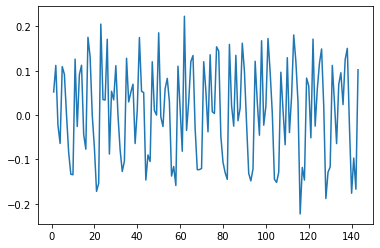

In [11]:
plt.plot(df.log)

# MA Model:

In [12]:

from statsmodels.tsa.arima_model import ARMA
from random import random



In [13]:

# fit model
model = ARMA(df["Crowd"], order=(0, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(df), len(df))
print(yhat)

144    425.108699
dtype: float64


# ARMA Model:

In [14]:
# fit model
model = ARMA(df["Crowd"], order=(2, 1))
model_fit = model.fit(disp=False)

In [15]:
yhat = model_fit.predict(len(df["Crowd"]), len(df["Crowd"]))
print(yhat)

144    470.008866
dtype: float64


# Another Methods:

In [16]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df.Crowd, nlags = 20)
lag_pacf = pacf(df.Crowd, nlags = 20)

C:\Users\Siddhartha\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


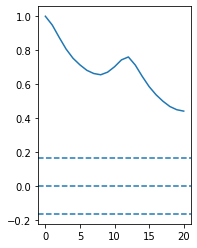

In [17]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--')

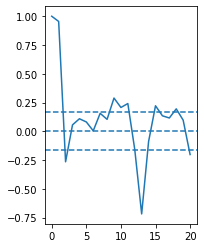

In [18]:

plt.subplot(121) 
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--')

In [19]:
from statsmodels.tsa.arima_model import ARIMA

In [20]:
#AR Model:

df_diff = df["Crowd"] - df["Crowd"].shift()

Text(0.5, 1.0, 'RSS: nan')

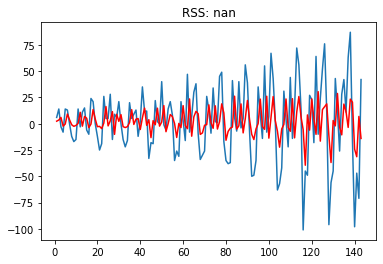

In [21]:
model = ARIMA(df["Crowd"], order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(df_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-df_diff)**2))

In [22]:
model.predict(df["Crowd"])

array([ 2.07480916e+02, -2.54440000e+04, -2.63940000e+04, -2.92280000e+04,
       -2.72919959e+04, -2.45065007e+04, -2.61128137e+04, -4.09766622e+04,
        1.33227099e+04, -4.66880650e+04,  2.35406637e+04, -5.24859302e+04,
        3.11929726e+04, -5.92185426e+04,  3.90054541e+04, -7.30983194e+04,
        5.46607655e+04, -8.27957392e+04,  6.66411947e+04, -1.03171450e+05,
        8.18885796e+04, -1.24202905e+05,  1.10346908e+05, -1.46150843e+05,
        1.35337124e+05, -1.73878403e+05,  1.66719631e+05, -2.13560675e+05,
        2.10690215e+05, -2.58089147e+05,  2.60907609e+05, -3.18821752e+05,
        3.20841269e+05, -3.88265483e+05,  4.02671837e+05, -4.70907768e+05,
        4.95720778e+05, -5.74527060e+05,  6.09110105e+05, -7.04271352e+05,
        7.57043449e+05, -8.60821285e+05,  9.29118185e+05, -1.05991652e+06,
        1.14024939e+06, -1.29619215e+06,  1.40871080e+06, -1.58592940e+06,
        1.72995959e+06, -1.94032666e+06,  2.12761219e+06, -2.38663045e+06,
        2.61793660e+06, -

Text(0.5, 1.0, 'RSS: nan')

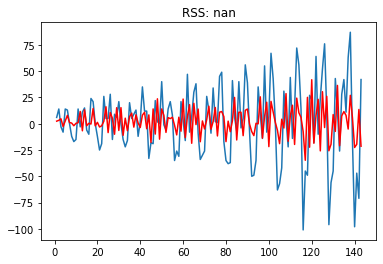

In [23]:
# MA model
model = ARIMA(df["Crowd"], order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(df_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-df_diff)**2))

Text(0.5, 1.0, 'RSS: nan')

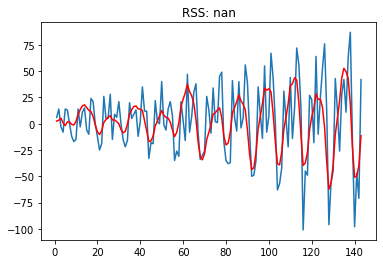

In [24]:
# ARIMA model
model = ARIMA(df["Crowd"], order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(df_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-df_diff)**2))

In [25]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

1    2.531162
2    3.351010
3    5.221613
4    0.789525
5   -1.830747
dtype: float64


In [26]:

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

1     2.531162
2     5.882171
3    11.103785
4    11.893310
5    10.062563
dtype: float64


In [27]:
predictions_ARIMA_log = pd.Series(df.ix[0], index=df.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\Siddhartha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


0        NaN
1    2.53116
2    5.88217
3    11.1038
4    11.8933
dtype: object

In [28]:
predictions_ARIMA_log.dtypes

dtype('O')

# Simple way to do TS:

In [29]:
crowd = df["Crowd"]

def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

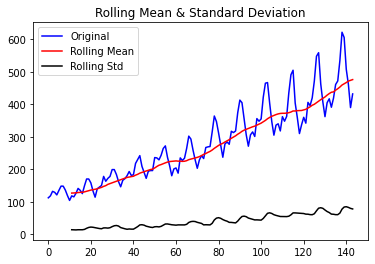

In [30]:
test_stationarity(crowd)

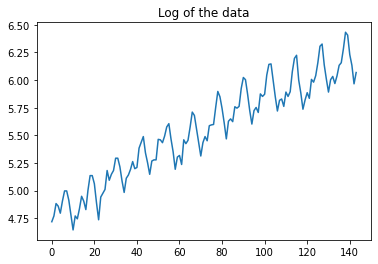

In [31]:
#Log-Transformation

ts_log = np.log(crowd)
plt.title('Log of the data')
plt.plot(ts_log)
plt.show()

# MA Once More

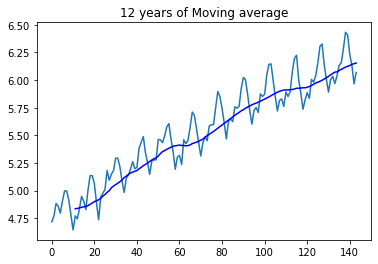

In [32]:

moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.title('12 years of Moving average')
plt.plot(moving_avg, color='blue')
plt.show()


In [33]:
ts_log_moving_avg_diff = ts_log - moving_avg      #Subtracting MA from log transformed TS

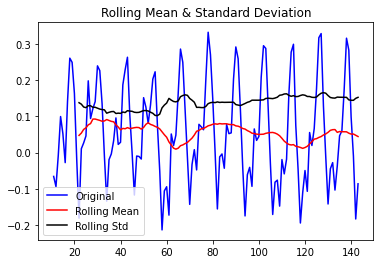

In [34]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

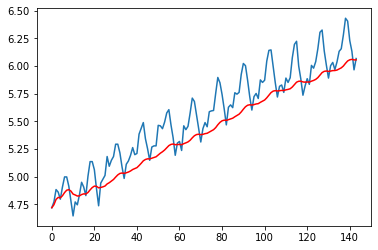

In [35]:
#Weighted MA: Recent values given more importance
expwighted_avg = ts_log.ewm(halflife=12).mean()
#parameter halflife is used to define the amount of exponential decay
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
plt.show()

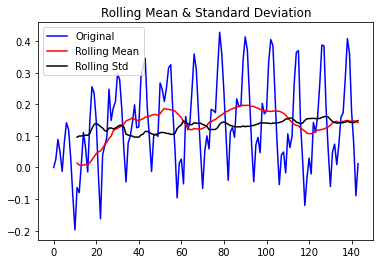

In [36]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

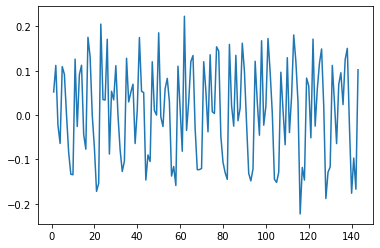

In [37]:
#Differencing to remove trend:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.show()

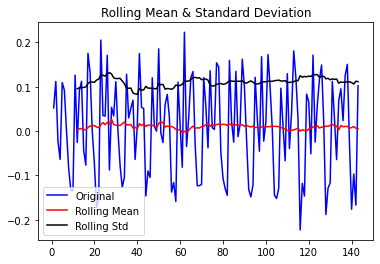

In [38]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)